In [2]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
# Load the Spotify songs CSV file
spotify = pd.read_csv("spotify_songs.csv")

In [6]:
X = spotify[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = np.ravel(spotify[['playlist_genre']])

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=46)

In [8]:
# Test values of k from 2 to 20 to find optimal value
k_values = range(2, 21)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

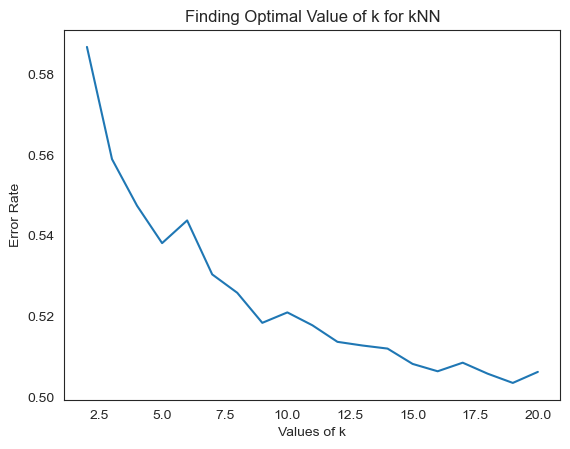

In [10]:
sns.set_style("white") # Set plot style

plt.plot(k_values, error_rates)
plt.title('Finding Optimal Value of k for kNN') # Add a title
plt.xlabel('Values of k') # Label x-axis
plt.ylabel('Error Rate') # Label y-axis
plt.show() # Show the plot

In [12]:
knn = KNeighborsClassifier(n_neighbors=7) # Create the k-NN model using k=7

knn.fit(X_train, y_train) # Train the model

y_pred = knn.predict(X_test) # Make predictions with test data

In [14]:
# Calculate accuracy and print results
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.46962083142987665


In [16]:
# Code to plot the confusion matrix
classnames = spotify['playlist_genre'].unique()
confusion_matrix = confusion_matrix(y_test, y_pred)

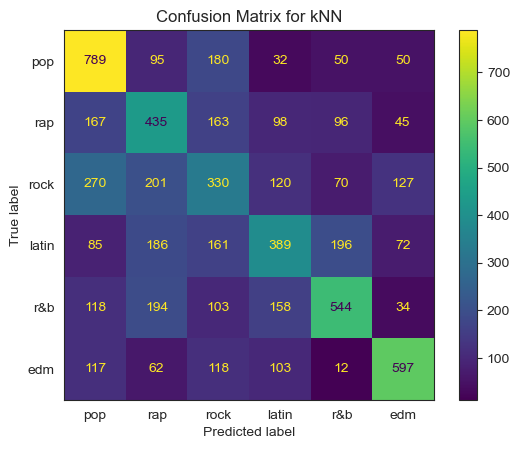

In [18]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classnames)
cm_display.plot()
plt.title('Confusion Matrix for kNN')
plt.show()

In [20]:
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=classnames)
print(report)

              precision    recall  f1-score   support

         pop       0.51      0.66      0.58      1196
         rap       0.37      0.43      0.40      1004
        rock       0.31      0.30      0.30      1118
       latin       0.43      0.36      0.39      1089
         r&b       0.56      0.47      0.51      1151
         edm       0.65      0.59      0.62      1009

    accuracy                           0.47      6567
   macro avg       0.47      0.47      0.47      6567
weighted avg       0.47      0.47      0.47      6567

